<a href="https://colab.research.google.com/github/alejandroart84/lab3/blob/main/LAB3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

from google.colab.patches import cv2_imshow # for image display
from skimage.metrics import peak_signal_noise_ratio
import skimage.filters as skif
import skimage.util as sku
from skimage import io

from PIL import Image 

import matplotlib.pylab as plt

/usr/local/lib/python3.7/dist-packages/skimage/io/manage_plugins.py:23: UserWarning: Your installed pillow version is < 8.1.2. Several security issues (CVE-2021-27921, CVE-2021-25290, CVE-2021-25291, CVE-2021-25293, and more) have been fixed in pillow 8.1.2 or higher. We recommend to upgrade this library.
  from .collection import imread_collection_wrapper


In [ ]:
def showPair(img,filt_img,titulo):
    fig, ax = plt.subplots(1, 2, figsize=(15, 20))
    ax[0].imshow(img, cmap=plt.cm.gray)
    ax[0].set_axis_off()
    ax[0].set_title('Original')
    ax[1].imshow(filt_img, cmap=plt.cm.gray)
    ax[1].set_axis_off()
    ax[1].set_title(titulo)
    plt.show()

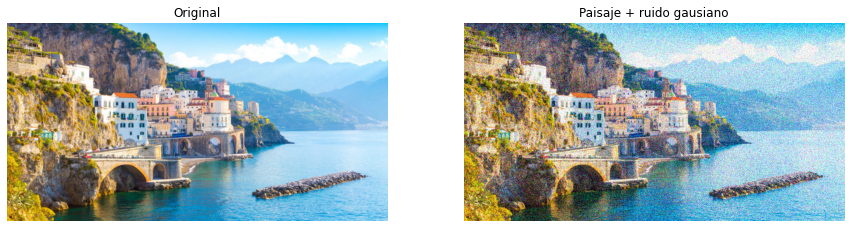

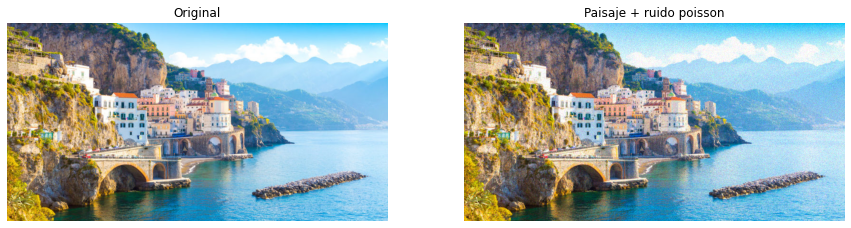

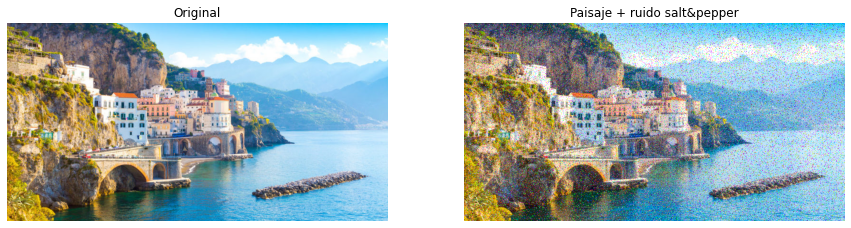

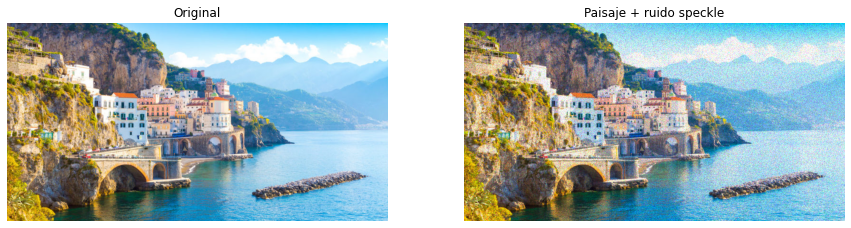

PSNR (gaussian) = 17.2155
PSNR (poisson) = 26.7080
PSNR (salt_pepper) = 14.7424
PSNR (speckle) = 21.0389


In [ ]:
from skimage.util.dtype import img_as_float
# Create a list to store the urls of the images
urls = "https://www.caracteristicas.co/wp-content/uploads/2018/09/italia-e1579918921504.jpg"
# Read and display the image
# loop over the image URLs, you could store several image urls in the list

image = io.imread(urls)
paisaje=img_as_float(image)

img_gaussian = sku.random_noise(paisaje,mode='gaussian',var=0.15**2)
img_poisson = sku.random_noise(paisaje,mode='poisson',clip=True)
img_salt_pepper = sku.random_noise(paisaje,mode='s&p',amount=0.1)
img_speckle = sku.random_noise(paisaje,mode='speckle',var=0.15**2)

showPair(paisaje,img_gaussian,"Paisaje + ruido gausiano")
showPair(paisaje,img_poisson,"Paisaje + ruido poisson")
showPair(paisaje,img_salt_pepper,"Paisaje + ruido salt&pepper")
showPair(paisaje,img_speckle,"Paisaje + ruido speckle")

psnr_gaussian = peak_signal_noise_ratio(paisaje, img_gaussian)
psnr_poisson = peak_signal_noise_ratio(paisaje, img_poisson)
psnr_salt_pepper = peak_signal_noise_ratio(paisaje, img_salt_pepper)
psnr_speckle = peak_signal_noise_ratio(paisaje, img_speckle)


print(f'PSNR (gaussian) = {psnr_gaussian:0.4f}')
print(f'PSNR (poisson) = {psnr_poisson:0.4f}')
print(f'PSNR (salt_pepper) = {psnr_salt_pepper:0.4f}')
print(f'PSNR (speckle) = {psnr_speckle:0.4f}')

#Aplicacion de filtros para la imagen contaminada con ruido gaussiano

/usr/local/lib/python3.7/dist-packages/skimage/_shared/utils.py:348: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  return func(*args, **kwargs)


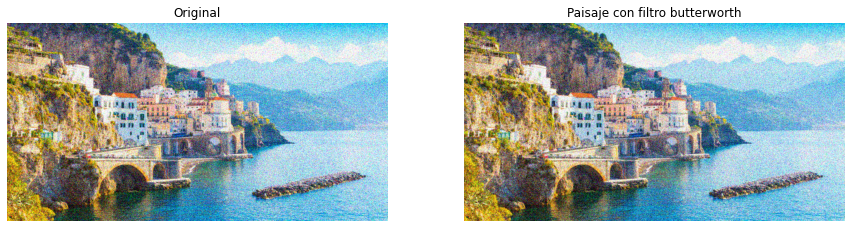

PSNR (gaussian) = 24.5517
PSNR (median) = 22.5070
PSNR (butterworth) = 20.6194
PSNR (sato) = 23.5420


In [ ]:
Filter_gaussian    = skif.gaussian(img_gaussian, 1)
Filter_median      = skif.median(img_gaussian,mode='reflect')
Filter_butter      = skif.butterworth(img_gaussian, high_pass=False, cutoff_frequency_ratio=0.5, order=5)
Filter_sato        = skif.unsharp_mask(img_gaussian, radius=0.5, amount=-2)

showPair(img_gaussian,Filter_gaussian,"imagen con filtro gaussiano")
showPair(img_gaussian,Filter_median,"Paisaje con filtro de mediana")
showPair(img_gaussian,Filter_butter,"Paisaje con filtro butterworth")
showPair(img_gaussian,Filter_sato,"Paisaje con filtro sato")

psnr_gaussian_gaussian =  peak_signal_noise_ratio(paisaje, Filter_gaussian)
psnr_gaussian_median   =  peak_signal_noise_ratio(paisaje, Filter_median)
psnr_gaussian_butter   =  peak_signal_noise_ratio(paisaje, Filter_butter)
psnr_gaussian_sato   =  peak_signal_noise_ratio(paisaje, Filter_sato)

print(f'PSNR (gaussian) = {psnr_gaussian_gaussian:0.4f}')
print(f'PSNR (median) = {psnr_gaussian_median:0.4f}')
print(f'PSNR (butterworth) = {psnr_gaussian_butter:0.4f}')
print(f'PSNR (sato) = {psnr_gaussian_sato:0.4f}')

#Aplicacion de filtros para la imagen contaminada con ruido de poisson

In [ ]:
Filter_gaussian    = skif.gaussian(img_poisson, 1)
Filter_median      = skif.median(img_poisson,mode='reflect')



showPair(img_poisson,Filter_gaussian,"imagen con filtro gaussiano")
showPair(img_poisson,Filter_median,"Paisaje con filtro de mediana")


psnr_gaussian_gaussian =  peak_signal_noise_ratio(paisaje, Filter_gaussian)
psnr_gaussian_median   =  peak_signal_noise_ratio(paisaje, Filter_median)


print(f'PSNR (gaussian) = {psnr_gaussian_gaussian:0.4f}')
print(f'PSNR (median) = {psnr_gaussian_median:0.4f}')

#Aplicacion de filtros para la imagen contaminada con ruido salt&pepper


In [ ]:
Filter_gaussian    = skif.gaussian(img_salt_pepper, 1)
Filter_median      = skif.median(img_salt_pepper,mode='reflect')



showPair(img_salt_pepper,Filter_gaussian,"imagen con filtro gaussiano")
showPair(img_salt_pepper,Filter_median,"Paisaje con filtro de mediana")


psnr_gaussian_gaussian =  peak_signal_noise_ratio(paisaje, Filter_gaussian)
psnr_gaussian_median   =  peak_signal_noise_ratio(paisaje, Filter_median)


print(f'PSNR (gaussian) = {psnr_gaussian_gaussian:0.4f}')
print(f'PSNR (median) = {psnr_gaussian_median:0.4f}')

#Aplicacion de filtros para la imagen contaminada con ruido speckle

In [ ]:
Filter_gaussian    = skif.gaussian(img_speckle, 1)
Filter_median      = skif.median(img_speckle,mode='reflect')



showPair(img_speckle,Filter_gaussian,"imagen con filtro gaussiano")
showPair(img_speckle,Filter_median,"Paisaje con filtro de mediana")


psnr_gaussian_gaussian =  peak_signal_noise_ratio(paisaje, Filter_gaussian)
psnr_gaussian_median   =  peak_signal_noise_ratio(paisaje, Filter_median)


print(f'PSNR (gaussian) = {psnr_gaussian_gaussian:0.4f}')
print(f'PSNR (median) = {psnr_gaussian_median:0.4f}')

In [ ]:
pip install scikit-image

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Operation cancelled by user
